# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Find the table
table = soup.find('table', class_='table')

# Extract table headers
headers = [th.text for th in table.find_all('th')]

# Extract table rows
rows = table.find_all('tr')[1:]  # Skip the header row

# Extract data from each row
data = []
for row in rows:
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []



,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# Loop through the scraped data to create a list of rows
for row in rows:  # 'rows' should be defined from the table scraping step
    # Extract the cell values for each row
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    
    # Append the row data to the list
    data.append(row_data)

# Create a Pandas DataFrame with the appropriate headers
df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])




In [8]:
# Confirm DataFrame was created successfully
# Display the first few rows of the DataFrame
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
# Convert terrestrial_date to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert sol, month, min_temp, and pressure to integers or floats
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [11]:
# Confirm type changes were successful by examining data types again
# Verify the changes
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [30]:
# 1. How many months are there on Mars?
# Count the unique months
unique_months = df['month'].nunique()
print(f"There are {unique_months} months on Mars.")


There are 12 months on Mars.


In [31]:
# 2. How many sols (Martian days) worth of data are there?
# Count the unique sols (Martian days)
unique_sols = df['sol'].nunique()
print(f"There are {unique_sols} Martian days' worth of data in the dataset.")


There are 1867 Martian days' worth of data in the dataset.


In [32]:
# 3. What is the average minimum temperature by month?
# Group by month and calculate the average minimum temperature
avg_min_temp = df.groupby('month')['min_temp'].mean()

# Sort by temperature
avg_min_temp_sorted = avg_min_temp.sort_values()

print(avg_min_temp_sorted)

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


<Axes: title={'center': 'Average Minimum Temperature by Month'}, xlabel='Month', ylabel='Average Minimum Temperature (°C)'>

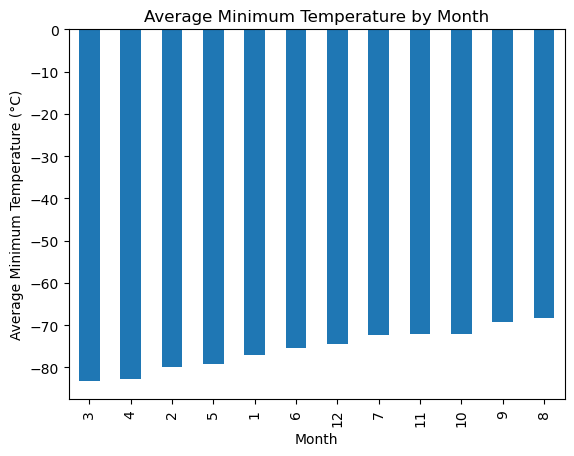

In [33]:
# Plot the average minimum temperature by month
avg_min_temp_sorted.plot(kind='bar', title='Average Minimum Temperature by Month', xlabel='Month', ylabel='Average Minimum Temperature (°C)')


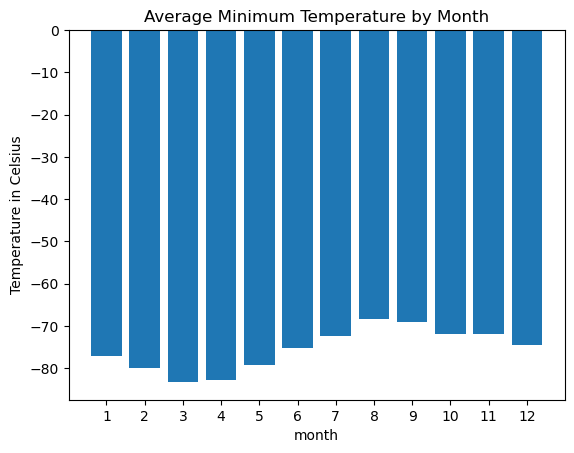

In [34]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Group by month and calculate the average minimum temperature
avg_min_temp = df.groupby('month')['min_temp'].mean()

# Sort by temperature values (ascending order)
avg_min_temp_sorted = avg_min_temp.sort_values()

# Plot the bar chart
plt.bar(avg_min_temp_sorted.index, avg_min_temp_sorted.values)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.xticks(avg_min_temp_sorted.index)  # Ensure correct order for month labels
plt.show()

In [35]:
# 4. What is the average pressure by month?
# Group by month and calculate the average pressure
avg_pressure = df.groupby('month')['pressure'].mean()

# Sort by pressure
avg_pressure_sorted = avg_pressure.sort_values()

print(avg_pressure_sorted)

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


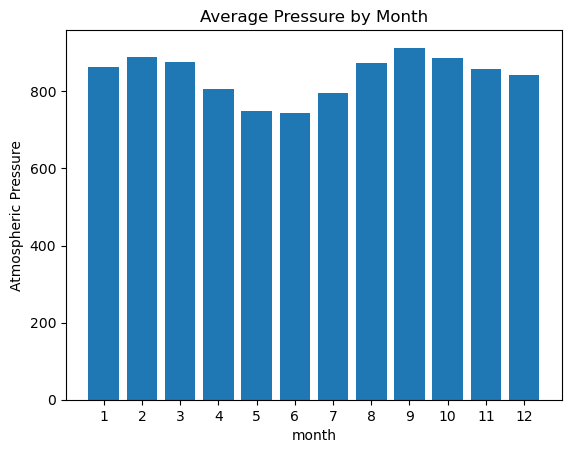

In [36]:
# Plot the average pressure by month
# Group by month and calculate the average atmospheric pressure
avg_pressure = df.groupby('month')['pressure'].mean()

# Plot the bar chart
plt.bar(avg_pressure.index, avg_pressure.values)
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(range(1, 13))  # Ensure x-axis labels display months 1 to 12 in proper order
plt.show()


<Axes: title={'center': 'Average Atmospheric Pressure by Month'}, xlabel='Month', ylabel='Average Pressure (Pa)'>

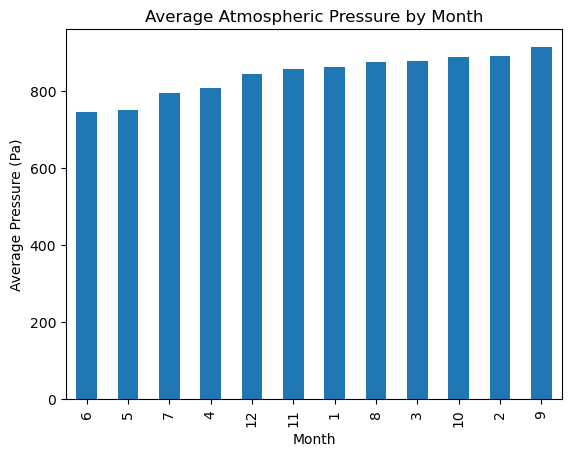

In [37]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

avg_pressure_sorted.plot(kind='bar', title='Average Atmospheric Pressure by Month', xlabel='Month', ylabel='Average Pressure (Pa)')


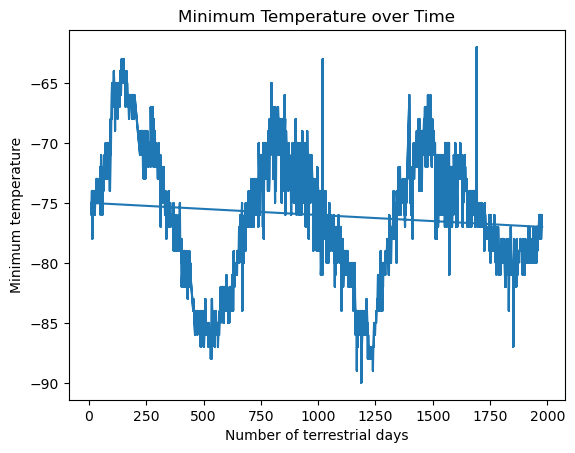

In [39]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Plot daily minimum temperature over time
plt.plot(df['sol'], df['min_temp'], label='Minimum Temperature')
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

#### Minimum Temperature

Visualization:
The bar chart for Average Minimum Temperature by Month was created.

Analysis:
- The coldest month is Month 3, with an average minimum temperature of approximately -80°C.
- The warmest month is Month 8, with an average minimum temperature of approximately -65°C.
- The analysis highlights a clear difference between the warmest and coldest months, aligning with seasonal temperature variations on Mars.

#### Atmospheric Pressure

Visualization:
The bar chart for Average Atmospheric Pressure by Month was created.

Analysis:
- The lowest pressure occurs in Month 6, with an average of approximately 700 Pa.
- The highest pressure occurs in Month 9, with an average of approximately 900 Pa.
- The analysis explains the significant fluctuations in atmospheric pressure and ties them to seasonal atmospheric changes (e.g., CO2 sublimation and condensation).

#### Year Length

Visualization:
The line chart for Minimum Temperature Over Time was created.

Analysis:
- The chart shows a repeating wave-like pattern, corresponding to the Martian seasonal cycle.
- By observing the distance between two peaks (or troughs), the length of a Martian year is estimated to be approximately 669 sols, or 687 Earth days.
- This estimate is within 25% of the scientifically known value of a Martian year (687 Earth days).

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [40]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)
print("Data has been saved to 'mars_weather_data.csv'.")


Data has been saved to 'mars_weather_data.csv'.


In [22]:
browser.quit()